In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from scipy import stats
import statsmodels.api as sm

%matplotlib inline
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
path = r"C:\Users\GaukharJavarova\Downloads\rfft.csv"
rfft = pd.read_csv(path)

<IPython.core.display.Javascript object>

In [3]:
rfft.head()


,Casenr,Age,Gender,Education,Measurement,Unique,Perseverative,Interval
0,1,74,Male,Lower secondary school (ISCED 2),Measurement 1 (2003-2006),32.0,1.0,Not applicable
1,1,74,Male,Lower secondary school (ISCED 2),Measurement 2 (2006-2008),35.0,0.0,2.842122556
2,1,74,Male,Lower secondary school (ISCED 2),Measurement 3 (2008-2012),50.5,14.5,2.201232033
3,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 1 (2003-2006),26.0,3.0,Not applicable
4,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 2 (2006-2008),47.0,3.0,2.762718362


<IPython.core.display.Javascript object>

In [4]:
rfft.shape

(7545, 8)

<IPython.core.display.Javascript object>

In [5]:
# to ease the analysis should pivot the data. #pivot is made for taking the values i need from the dataset

rfft_unique = rfft.pivot(index="Casenr", columns="Measurement", values="Unique")
rfft_unique.head()

Measurement,Measurement 1 (2003-2006),Measurement 2 (2006-2008),Measurement 3 (2008-2012)
Casenr,,,
1,32.0,35.0,50.5
2,26.0,47.0,71.0
3,91.0,83.5,77.0
4,59.0,54.0,64.0
5,60.0,68.0,21.0


<IPython.core.display.Javascript object>

Is there a significant difference in the number of unique designs drawn by the same participants from measurement 2 to measurement 3?

check the difference. looks normal, use a ttest.

DescribeResult(nobs=2515, minmax=(-75.5, 68.5), mean=4.015506958250497, variance=342.2368318331855, skewness=-0.15837265462838976, kurtosis=0.7823714353134701)


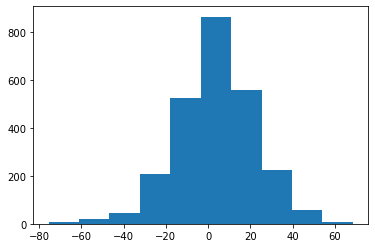

<IPython.core.display.Javascript object>

In [6]:
plt.hist(
    rfft_unique["Measurement 3 (2008-2012)"] - rfft_unique["Measurement 2 (2006-2008)"]
)
print(
    stats.describe(
        rfft_unique["Measurement 3 (2008-2012)"]
        - rfft_unique["Measurement 2 (2006-2008)"]
    )
)

In [7]:
stats.ttest_rel(
    rfft_unique["Measurement 3 (2008-2012)"], rfft_unique["Measurement 2 (2006-2008)"]
)

Ttest_relResult(statistic=10.88544039426271, pvalue=5.3585747477799544e-27)

<IPython.core.display.Javascript object>

DescribeResult(nobs=2515, minmax=(-75.5, 68.5), mean=4.015506958250497, variance=342.2368318331855, skewness=-0.15837265462838976, kurtosis=0.7823714353134701)


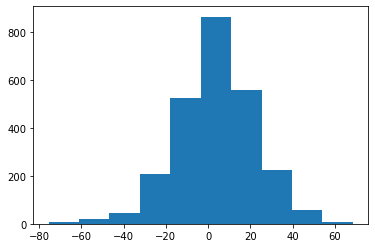

<IPython.core.display.Javascript object>

In [20]:
plt.hist(
    rfft_unique["Measurement 3 (2008-2012)"] - rfft_unique["Measurement 2 (2006-2008)"]
)
print(
    stats.describe(
        rfft_unique["Measurement 3 (2008-2012)"]
        - rfft_unique["Measurement 2 (2006-2008)"],
    )
)

Is there a significant difference in the number of perseverative errors drawn by the same participants from measurement 2 to measurement 3?

In [9]:
rfft_pers = rfft.pivot(index="Casenr", columns="Measurement", values="Perseverative")
rfft_pers.head()

Measurement,Measurement 1 (2003-2006),Measurement 2 (2006-2008),Measurement 3 (2008-2012)
Casenr,,,
1,1.0,0.0,14.5
2,3.0,3.0,0.5
3,11.0,21.0,17.0
4,49.0,39.0,11.0
5,14.0,16.0,0.0


<IPython.core.display.Javascript object>

(array([1.821e+03, 4.560e+02, 1.210e+02, 5.200e+01, 2.800e+01, 1.600e+01,
        1.300e+01, 3.000e+00, 4.000e+00, 1.000e+00]),
 array([  0.  ,  13.35,  26.7 ,  40.05,  53.4 ,  66.75,  80.1 ,  93.45,
        106.8 , 120.15, 133.5 ]),
 <BarContainer object of 10 artists>)

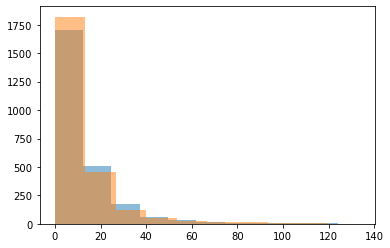

<IPython.core.display.Javascript object>

In [14]:
plt.hist(rfft_pers["Measurement 3 (2008-2012)"], alpha=0.5)
plt.hist(rfft_pers["Measurement 2 (2006-2008)"], alpha=0.5)

In [17]:
# non-noraml distribution = Wilcoxon
stats.wilcoxon(
    rfft_pers["Measurement 3 (2008-2012)"], rfft_pers["Measurement 2 (2006-2008)"]
)

WilcoxonResult(statistic=1358373.0, pvalue=0.0006927535563546565)

<IPython.core.display.Javascript object>

In [ ]:
p<.05 - reject the null, sig difference between two groups. 